In [1]:
# import create_grid
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import os
import glob
from shapely.geometry import Polygon, box
import pandas as pd

In [2]:
DATA_PATH = '/lustre/davis/FishPonds_project/share/data/'

nigeria_all = gpd.read_file(os.path.join(DATA_PATH, 
                                         "Nigeria/ngaadmbndaadm1osgof/nga_admbnda_adm1_osgof_20161215.shp")).to_crs('EPSG:3857')


In [3]:
states = nigeria_all['admin1Name'].values

In [4]:
states

array(['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa',
       'Benue', 'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti',
       'Enugu', 'Federal Capital Territory', 'Gombe', 'Imo', 'Jigawa',
       'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos',
       'Nasarawa', 'Niger', 'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau',
       'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara'], dtype=object)

In [5]:
states[2].strip()

'Akwa Ibom'

In [6]:
nigeria_all['admin1Name'] = nigeria_all['admin1Name'].apply(lambda x: x.replace(" ", ""))

In [7]:
nigeria_all

,admin1Name,admin1Pcod,admin1RefN,admin1AltN,admin1Al_1,admin0Name,admin0Pcod,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,Abia,NG001,Abia,None,None,Nigeria,NG,2016-11-29,2016-12-15,NaT,4.695135,0.396543,"POLYGON ((822295.962 673246.325, 822348.927 67..."
1,Adamawa,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29,2016-12-15,NaT,11.525443,3.113007,"POLYGON ((1516314.983 1226236.928, 1516830.319..."
2,AkwaIbom,NG003,Akwa Ibom,None,None,Nigeria,NG,2016-11-29,2016-12-15,NaT,5.263830,0.549476,"MULTIPOLYGON (((928940.568 513893.874, 928956...."
3,Anambra,NG004,Anambra,None,None,Nigeria,NG,2016-11-29,2016-12-15,NaT,3.595960,0.392661,"POLYGON ((771726.755 748767.776, 771629.731 74..."
4,Bauchi,NG005,Bauchi,None,None,Nigeria,NG,2016-11-29,2016-12-15,NaT,13.952005,4.011018,"POLYGON ((1196823.739 1398273.014, 1197368.839..."
5,Bayelsa,NG006,Bayelsa,None,None,Nigeria,NG,2016-11-29,2016-12-15,NaT,5.046708,0.776768,"POLYGON ((729457.45 599766.924, 730476.032 599..."
6,Benue,NG007,Benue,None,None,Nigeria,NG,2016-11-29,2016-12-15,NaT,9.408080,2.578363,"POLYGON ((948934.625 911145.954, 950935.146 91..."
7,Borno,NG008,Borno,None,None,Nigeria,NG,2016-11-29,2016-12-15,NaT,13.714364,5.987849,"POLYGON ((1487100.684 1541265.083, 1487459.219..."
8,CrossRiver,NG009,Cross River,None,None,Nigeria,NG,2016-11-29,2016-12-15,NaT,8.779796,1.711218,"MULTIPOLYGON (((952970.504 534789.137, 952832...."
9,Delta,NG010,Delta,None,None,Nigeria,NG,2016-11-29,2016-12-15,NaT,7.372526,1.394082,"POLYGON ((742380.893 725272.058, 742624.967 72..."


In [8]:
nigeria_all['admin1Name'].values

array(['Abia', 'Adamawa', 'AkwaIbom', 'Anambra', 'Bauchi', 'Bayelsa',
       'Benue', 'Borno', 'CrossRiver', 'Delta', 'Ebonyi', 'Edo', 'Ekiti',
       'Enugu', 'FederalCapitalTerritory', 'Gombe', 'Imo', 'Jigawa',
       'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos',
       'Nasarawa', 'Niger', 'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau',
       'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara'], dtype=object)

In [9]:
# create grid in state
def create_grid_all(STATE):
    print(STATE)
    state_geometry = nigeria_all[nigeria_all['admin1Name'] == STATE]
    xmin, ymin, xmax, ymax = state_geometry.total_bounds
    
    length = 6000#20000
    wide = 6000#20000
    
    cols = np.arange(xmin, xmax + wide, wide)
    rows = np.arange(ymin, ymax + length, length)
    
    polygons = []
    for x in cols[:-1]:
        for y in rows[:-1]:
            polygons.append(Polygon([(x,y), (x+wide, y), (x+wide, y+length), (x, y+length)]))
            # print(polygons[-1])
    
    grid = gpd.GeoDataFrame({'geometry':polygons}, crs='EPSG:3857')
    
    grid_state = grid.iloc[state_geometry.sjoin_nearest(grid)['index_right']].sort_index().reset_index(drop=True)
    return grid_state

In [10]:
states

array(['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa',
       'Benue', 'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti',
       'Enugu', 'Federal Capital Territory', 'Gombe', 'Imo', 'Jigawa',
       'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos',
       'Nasarawa', 'Niger', 'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau',
       'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara'], dtype=object)

In [11]:
buffer = gpd.read_file("building_buffer/buffer_7_5km_dissolved.shp").to_crs('EPSG:3857')

In [14]:
total_grid_3 = []
total_grid_5 = []
total_grid_nobuff = []
for s in nigeria_all['admin1Name'].values:
    grid = create_grid_all(s)
    grid['area_inter'] = grid.apply(lambda row: row['geometry'].intersection(buffer.loc[0, 'geometry']).area, axis=1)
    grid_state_buffer_3 = grid[grid['area_inter'] >= 200*200*90*3]
    grid_state_buffer_5 = grid[grid['area_inter'] >= 200*200*90*5]
    total_grid_3.append(len(grid_state_buffer_3))
    total_grid_5.append(len(grid_state_buffer_5))
    total_grid_nobuff.append(len(grid))

Abia
Adamawa
AkwaIbom
Anambra
Bauchi
Bayelsa
Benue
Borno
CrossRiver
Delta
Ebonyi
Edo
Ekiti
Enugu
FederalCapitalTerritory
Gombe
Imo
Jigawa
Kaduna
Kano
Katsina
Kebbi
Kogi
Kwara
Lagos
Nasarawa
Niger
Ogun
Ondo
Osun
Oyo
Plateau
Rivers
Sokoto
Taraba
Yobe
Zamfara


In [16]:
total_grid_nobuff

[183,
 1223,
 226,
 175,
 1562,
 324,
 1006,
 2259,
 674,
 567,
 231,
 639,
 200,
 265,
 246,
 570,
 173,
 809,
 1422,
 681,
 803,
 1235,
 942,
 1094,
 140,
 873,
 2276,
 577,
 507,
 298,
 887,
 852,
 347,
 1070,
 1829,
 1440,
 1088]

In [ ]:
# size_bytes = os.path.getsize('data/Kaduna/6/geocoords')

In [ ]:
# size_mbytes = size_bytes/1e6

In [ ]:
# size_mbytes_10k = size_mbytes*34

In [ ]:
# size_mbytes_10k

In [ ]:
glob.glob('../users/2221/FishPonds/data/Ogun_true_annotations_geocoord_all*')

In [ ]:
sum([os.path.getsize(x) for x in glob.glob('../users/2221/FishPonds/data/Ogun_true_annotations_geocoord_all*')])

In [ ]:
1565071/1e6

In [ ]:
1565071*2.1/1e6

In [ ]:
sum([os.path.getsize(x) for x in glob.glob('../users/2221/FishPonds/data/Delta_true_annotations_geocoord_all*')])

In [ ]:
919294*3.5/1e6

In [21]:
table = pd.DataFrame(data={'state': states, '# of (6km x 6km) boxes to cover state': np.array(total_grid_nobuff),
                  '# tif images (2,000x2,000 pixels)': np.array(total_grid_nobuff)*1444,
                  # 'max # days to predict state using 1 CPU, 1 GPU': np.round(np.array(total_grid)*5/24),})
            'MB to store 5,000 predictions (total country: 60MB)': np.ones(len(total_grid_nobuff))*3.2/2,
            '~# days to have 5,000 predictions using 1CPU (total country: 3552 hours)': round(17*5/24)})
# table.to_csv('table_darwin_resources.csv', index=False)

In [22]:
table

,state,# of (6km x 6km) boxes to cover state,"# tif images (2,000x2,000 pixels)","MB to store 5,000 predictions (total country: 60MB)","~# days to have 5,000 predictions using 1CPU (total country: 3552 hours)"
0,Abia,183,264252,1.6,4
1,Adamawa,1223,1766012,1.6,4
2,Akwa Ibom,226,326344,1.6,4
3,Anambra,175,252700,1.6,4
4,Bauchi,1562,2255528,1.6,4
5,Bayelsa,324,467856,1.6,4
6,Benue,1006,1452664,1.6,4
7,Borno,2259,3261996,1.6,4
8,Cross River,674,973256,1.6,4
9,Delta,567,818748,1.6,4


In [23]:
np.sum(total_grid_nobuff)*6*6

np.int64(1068948)

In [24]:
np.sum(total_grid_3)*6*6

np.int64(931716)

In [25]:
np.sum(total_grid_5)*6*6

np.int64(893700)

In [12]:
DATA_PATH = '/lustre/davis/FishPonds_project/share/data/'
STATE = 'Yobe'

In [13]:
def create_grid(DATA_PATH, STATE, GRID_NUM=0, load=False):
    print(f'CREATING GRID FOR {STATE}')
    # if not os.paath.exists(os.path.join(DATA_PATH, f"{STATE}/grid_{STATE}.shp")):
    nigeria_all = gpd.read_file(os.path.join(DATA_PATH, "Nigeria/ngaadmbndaadm1osgof/nga_admbnda_adm1_osgof_20161215.shp")).to_crs('EPSG:3857')
    nigeria_all['admin1Name'] = nigeria_all['admin1Name'].apply(lambda x: x.replace(" ", ""))
    state_geometry = nigeria_all[nigeria_all['admin1Name'] == STATE]
    #state_geometry.total_bounds

    # create grid in state
    xmin, ymin, xmax, ymax = state_geometry.total_bounds

    length = 6000#20000
    wide = 6000#20000

    cols = np.arange(xmin, xmax + wide, wide)
    rows = np.arange(ymin, ymax + length, length)

    polygons = []
    for x in cols[:-1]:
        for y in rows[:-1]:
            polygons.append(Polygon([(x,y), (x+wide, y), (x+wide, y+length), (x, y+length)]))
            # print(polygons[-1])

    grid = gpd.GeoDataFrame({'geometry':polygons}, crs='EPSG:3857')

    grid_state = grid.iloc[state_geometry.sjoin_nearest(grid)['index_right']].sort_index().reset_index(drop=True)
    # grid_state.to_file(os.path.join(DATA_PATH, f"{STATE}/grid_{STATE}.shp"))
    return grid_state, state_geometry
    # else:
    #     print(f'Grid for {STATE} already exist, loading it')

In [14]:
yobe, yobe_state_geometry = create_grid(DATA_PATH, STATE, GRID_NUM=0, load=False)

CREATING GRID FOR Yobe


In [15]:
width = 2000
height = 2000
k = 29
overlap = 400
extent_big = yobe.loc[k].geometry.bounds
xmax = extent_big[2] + 2*(overlap*0.1)#extent_big.xMaximum()
h = extent_big[3] - extent_big[1] #extent_big.height()
w = extent_big[2] - extent_big[0] #extent_big.width()
# iter_w = int(round(((w+2000)/0.1)/width,0))
# iter_h = int(round(((h+2000)/0.1)/height,0))

iter_w = int(round((w/0.1)/width,0))
iter_h = int(round((h/0.1)/height,0))
add_w = (overlap*(iter_w))/(width-overlap)
add_h = (overlap*(iter_h))/(width-overlap)
if add_w < 1:
    add_w = np.ceil(add_w)
if add_h < 1:
    add_h = np.ceil(add_h)
iter_w = iter_w + int(add_w) + 1
iter_h = iter_h + int(add_h) + 1 


# pixel size is 0.1m
sy = width * 0.1 #h / iter_h
sx = height * 0.1 #w / iter_w
#print(sy, sx, xmax)
xmin = xmax - sx 
polygons = []
# print(f"EXTRACTING TIF FILES FROM XYZ GOOGLE TILES OF {STATE} AND GRID NUM {GRID_NUM}")
for i in range(iter_w):
    ymax = extent_big[3] + 2*(overlap*0.1)#extent_big.yMaximum()
    ymin = ymax - sy
    for j in range(iter_h):
        polygons.append(Polygon([(xmin,ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)]))
        ymax = ymin + (overlap*0.1)
        ymin = ymax - sy
    xmax = xmin + (overlap*0.1)
    xmin = xmax - sx 

yobe_tiles = gpd.GeoDataFrame({'geometry':polygons}, crs='EPSG:3857')

In [16]:
buffer = gpd.read_file("building_buffer/buffer_7_5km_dissolved.shp").to_crs('EPSG:3857')

In [31]:
yobe['area_inter_x'] = yobe.apply(lambda row: row['geometry'].intersection(buffer.loc[0, 'geometry']).area, axis=1)
yobe_grid_state_buffer = yobe[yobe['area_inter_x'] >= 200*200*90*5]

(1173110.7105828468, 1517110.7105828468)

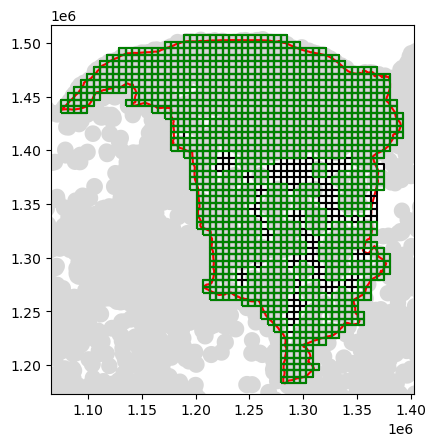

In [32]:
fig, ax = plt.subplots()

yobe_state_geometry.boundary.plot(ax=ax, color='red')
yobe.boundary.plot(ax=ax, color='black')

buffer.plot(ax=ax, color='gray', alpha=0.3)
yobe_grid_state_buffer.boundary.plot(ax=ax, color='green')
# grid_state_buffer.plot(ax=ax, color='navy', alpha=0.5)

minx, miny, maxx, maxy = yobe.total_bounds
ax.set_xlim(minx-10000, maxx+10000)
ax.set_ylim(miny-10000, maxy+10000)

CREATING GRID FOR Edo


(630759.9872747001, 860759.9872747001)

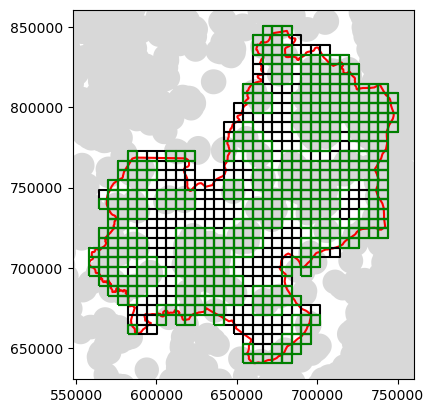

In [33]:
STATE = 'Edo'
edo, edo_state_geometry = create_grid(DATA_PATH, STATE, GRID_NUM=0, load=False)

width = 2000
height = 2000
k = 29
overlap = 400
extent_big = edo.loc[k].geometry.bounds
xmax = extent_big[2] + 2*(overlap*0.1)#extent_big.xMaximum()
h = extent_big[3] - extent_big[1] #extent_big.height()
w = extent_big[2] - extent_big[0] #extent_big.width()
# iter_w = int(round(((w+2000)/0.1)/width,0))
# iter_h = int(round(((h+2000)/0.1)/height,0))

iter_w = int(round((w/0.1)/width,0))
iter_h = int(round((h/0.1)/height,0))
add_w = (overlap*(iter_w))/(width-overlap)
add_h = (overlap*(iter_h))/(width-overlap)
if add_w < 1:
    add_w = np.ceil(add_w)
if add_h < 1:
    add_h = np.ceil(add_h)
iter_w = iter_w + int(add_w) + 1
iter_h = iter_h + int(add_h) + 1 


# pixel size is 0.1m
sy = width * 0.1 #h / iter_h
sx = height * 0.1 #w / iter_w
#print(sy, sx, xmax)
xmin = xmax - sx 
polygons = []
# print(f"EXTRACTING TIF FILES FROM XYZ GOOGLE TILES OF {STATE} AND GRID NUM {GRID_NUM}")
for i in range(iter_w):
    ymax = extent_big[3] + 2*(overlap*0.1)#extent_big.yMaximum()
    ymin = ymax - sy
    for j in range(iter_h):
        polygons.append(Polygon([(xmin,ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)]))
        ymax = ymin + (overlap*0.1)
        ymin = ymax - sy
    xmax = xmin + (overlap*0.1)
    xmin = xmax - sx 

edo_tiles = gpd.GeoDataFrame({'geometry':polygons}, crs='EPSG:3857')

edo['area_inter_x'] = edo.apply(lambda row: row['geometry'].intersection(buffer.loc[0, 'geometry']).area, axis=1)
edo_grid_state_buffer = edo[edo['area_inter_x'] >= 200*200*90*5]

fig, ax = plt.subplots()

edo_state_geometry.boundary.plot(ax=ax, color='red')
edo.boundary.plot(ax=ax, color='black')

buffer.plot(ax=ax, color='gray', alpha=0.3)
edo_grid_state_buffer.boundary.plot(ax=ax, color='green')
# grid_state_buffer.plot(ax=ax, color='navy', alpha=0.5)

minx, miny, maxx, maxy = edo.total_bounds
ax.set_xlim(minx-10000, maxx+10000)
ax.set_ylim(miny-10000, maxy+10000)

In [20]:
DATA_PATH = '/lustre/davis/FishPonds_project/share/data/'
nigeria_all = gpd.read_file(os.path.join(DATA_PATH, "Nigeria/ngaadmbndaadm1osgof/nga_admbnda_adm1_osgof_20161215.shp")).to_crs('EPSG:3857')
# df = nigeria_all.merge(df_count, on='admin1Name', how='left')
# df = df.fillna(-100)

<Axes: >

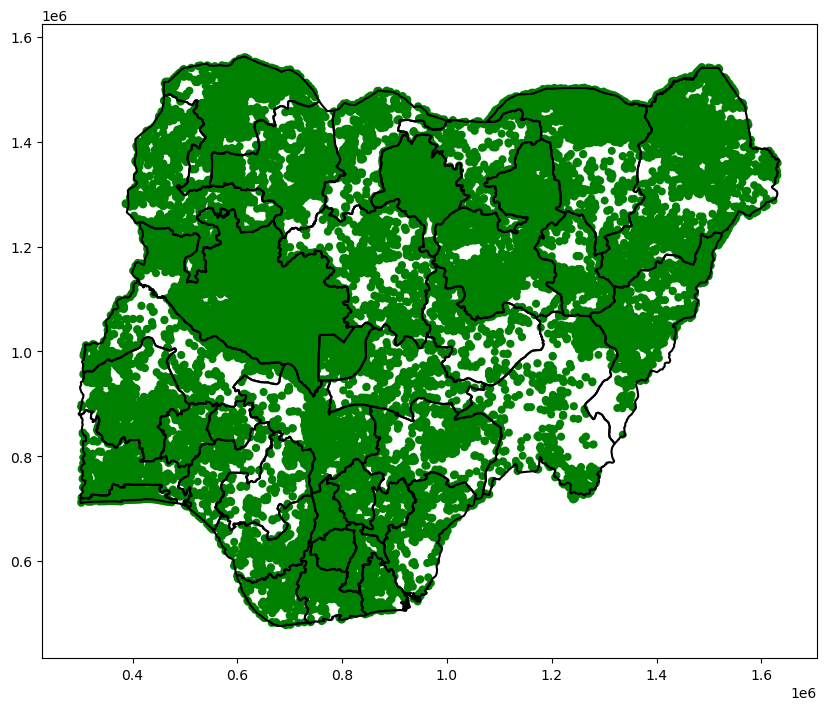

In [21]:
fig, ax = plt.subplots(figsize = (10,10))
# df.plot(column="count", ax=ax, cmap='Greens', vmax=500)
nigeria_all.boundary.plot(ax=ax, color='black')
buffer.plot(ax=ax, color='green')

In [22]:
from cartopy import crs as ccrs
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)

import matplotlib.ticker as ticker
from matplotlib_map_utils.core.north_arrow import NorthArrow, north_arrow
from matplotlib_map_utils.core.scale_bar import ScaleBar, scale_bar


In [23]:
buffer

,dissolve_f,geometry
0,1,"MULTIPOLYGON (((305702.707 704576.989, 305367...."


In [24]:
import matplotlib.patches as mpatches

/lustre/davis/sw/FishPonds/conda_qgis_2025/20250606/lib/python3.11/site-packages/matplotlib_map_utils/core/scale_bar.py:790: UserWarning: As one of bar['max'] and bar['major_div'] were not set, the values will be calculated automatically. This may result in different values from your input.
  warnings.warn(f"As one of bar['max'] and bar['major_div'] were not set, the values will be calculated automatically. This may result in different values from your input.")


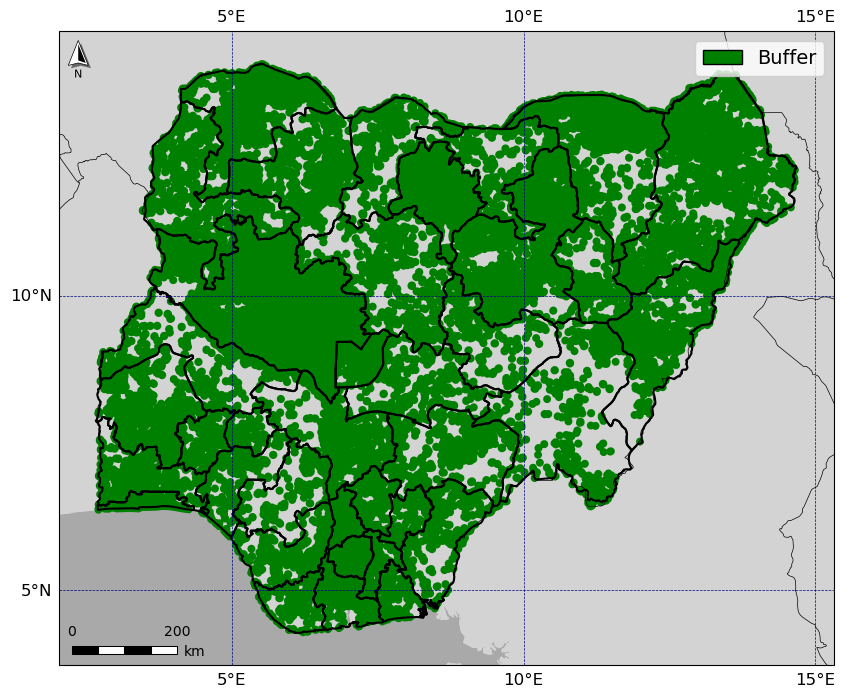

In [25]:
crs_epsg = ccrs.epsg("3857")
fig, ax = plt.subplots(figsize = (10,10), subplot_kw={'projection': crs_epsg})
nigeria_all.boundary.plot(ax=ax, color='black')
# buffer.plot(ax=ax, column='dissolve_f', cmap='Greens_r', legend=True)#, legend_kwds={'label': "Number of Fish Ponds use for training"})
buffer.plot(ax=ax, color='green')
# Format lat/lon gridlines using cartopy
lon_ticks = [0, 5, 10, 15]
lat_ticks = [5, 10]
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='navy', ls='--')
gl.xlocator = ticker.FixedLocator(lon_ticks)
gl.ylocator = ticker.FixedLocator(lat_ticks)
gl.right_labels = False
gl.bottom_labels = True
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}


import cartopy.feature as cfeature

# ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
# ax.add_feature(cfeature.LAKES, facecolor='lightgray')
# ax.add_feature(cfeature.STATES, linewidth=0.25)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='darkgray')
NorthArrow.set_size("small")
ScaleBar.set_size("small")
north_arrow(
    ax, location="upper left", rotation={"crs": crs_epsg, "reference": "center"}
)
scale_bar(ax, location="lower left", style="boxes", bar={"projection": crs_epsg, "unit": "km", "max": 200, }, 
          labels={"textcolors": "black"}, text= {"fontsize":10, "stroke_width":0})

LegendElement = [
                 mpatches.Patch(facecolor='Green', edgecolor='k', label='Buffer'),
                ]
ax.legend(handles = LegendElement, loc='upper right', fontsize=14)# plt.savefig('map_nigeria.png', dpi=100, bbox_inches='tight')

In [26]:
nigeria_all[nigeria_all['admin1Name'] == 'Sokoto'].bounds['minx'].values[0]

np.float64(459532.77217654383)

In [27]:
nigeria_all[nigeria_all['admin1Name'] == 'Sokoto'].centroid.buffer(0.01).bounds.values[0]

array([ 592124.62127583, 1464259.42545026,  592124.64127583,
       1464259.44545026])

In [28]:
nigeria_all[nigeria_all['admin1Name'] == 'Sokoto'].centroid.bounds.values[0]

array([ 592124.63127583, 1464259.43545026,  592124.63127583,
       1464259.43545026])

In [29]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes

/lustre/davis/sw/FishPonds/conda_qgis_2025/20250606/lib/python3.11/site-packages/matplotlib_map_utils/core/scale_bar.py:790: UserWarning: As one of bar['max'] and bar['major_div'] were not set, the values will be calculated automatically. This may result in different values from your input.
  warnings.warn(f"As one of bar['max'] and bar['major_div'] were not set, the values will be calculated automatically. This may result in different values from your input.")


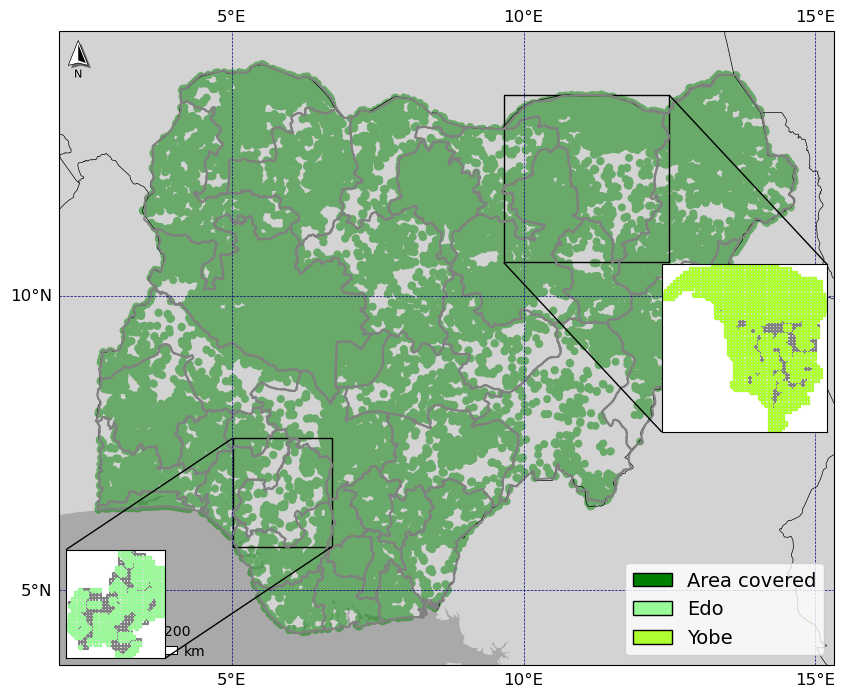

In [43]:
crs_epsg = ccrs.epsg("3857")
fig, ax = plt.subplots(figsize = (10,10), subplot_kw={'projection': crs_epsg})
nigeria_all.boundary.plot(ax=ax, color='gray')
buffer.plot(ax=ax, color='green', alpha=0.5)
# Format lat/lon gridlines using cartopy
lon_ticks = [0, 5, 10, 15]
lat_ticks = [5, 10]
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='navy', ls='--')
gl.xlocator = ticker.FixedLocator(lon_ticks)
gl.ylocator = ticker.FixedLocator(lat_ticks)
gl.right_labels = False
gl.bottom_labels = True
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}


import cartopy.feature as cfeature

# ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
# ax.add_feature(cfeature.LAKES, facecolor='lightgray')
# ax.add_feature(cfeature.'Yobe'S, linewidth=0.25)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='darkgray')
NorthArrow.set_size("small")
ScaleBar.set_size("small")
north_arrow(
    ax, location="upper left", rotation={"crs": crs_epsg, "reference": "center"}
)
scale_bar(ax, location="lower left", style="boxes", bar={"projection": crs_epsg, "unit": "km", "max": 200, }, 
          labels={"textcolors": "black"}, text= {"fontsize":10, "stroke_width":0})

LegendElement = [
                 mpatches.Patch(facecolor='Green', edgecolor='k', label='Buffer'),
                ]
ax.legend(handles = LegendElement, loc='upper right', fontsize=14)

axins2 = zoomed_inset_axes(ax, zoom=1, loc="center right")
yobe.boundary.plot(ax=axins2, color='gray')
# buffer.plot(ax=axins2, color='gray', alpha=0.3)
yobe_grid_state_buffer.boundary.plot(ax=axins2, color='greenyellow')

# subregion of the original image
x1, x2, y1, y2 = (nigeria_all[nigeria_all['admin1Name'] == 'Yobe'].bounds['minx'].values[0],
                  nigeria_all[nigeria_all['admin1Name'] == 'Yobe'].bounds['maxx'].values[0],
                  nigeria_all[nigeria_all['admin1Name'] == 'Yobe'].bounds['miny'].values[0],
                  nigeria_all[nigeria_all['admin1Name'] == 'Yobe'].bounds['maxy'].values[0])
axins2.set_xlim(x1, x2)
axins2.set_ylim(y1, y2)
# fix the number of ticks on the inset Axes
axins2.yaxis.get_major_locator().set_params(nbins=1)
axins2.xaxis.get_major_locator().set_params(nbins=1)
axins2.set_xticks([])
axins2.set_yticks([])

# connecting lines between the bbox and the inset Axes area
mark_inset(ax, axins2, loc1=3, loc2=1, fc="none", edgecolor="black")




axins3 = zoomed_inset_axes(ax, zoom=1, loc="lower left")
edo.boundary.plot(ax=axins3, color='gray')
edo_grid_state_buffer.boundary.plot(ax=axins3, color='palegreen')

# buffer.plot(ax=axins3, color='gray', alpha=0.3)

# subregion of the original image
x1, x2, y1, y2 = (nigeria_all[nigeria_all['admin1Name'] == 'Edo'].bounds['minx'].values[0],
                  nigeria_all[nigeria_all['admin1Name'] == 'Edo'].bounds['maxx'].values[0],
                  nigeria_all[nigeria_all['admin1Name'] == 'Edo'].bounds['miny'].values[0],
                  nigeria_all[nigeria_all['admin1Name'] == 'Edo'].bounds['maxy'].values[0])
axins3.set_xlim(x1, x2)
axins3.set_ylim(y1, y2)
# fix the number of ticks on the inset Axes
axins3.yaxis.get_major_locator().set_params(nbins=1)
axins3.xaxis.get_major_locator().set_params(nbins=1)
axins3.set_xticks([])
axins3.set_yticks([])

LegendElement = [
    mpatches.Patch(facecolor='Green', edgecolor='k', label='Area covered'),
                 mpatches.Patch(facecolor='palegreen', edgecolor='k', label='Edo'),
                mpatches.Patch(facecolor='greenyellow', edgecolor='k', label='Yobe'),
                ]
ax.legend(handles = LegendElement, loc='lower right', fontsize=14)

# connecting lines between the bbox and the inset Axes area
mark_inset(ax, axins3, loc1=2, loc2=4, fc="none", edgecolor="black")

plt.savefig('map_nigeria_buffer.png', dpi=100, bbox_inches='tight')
